In [1]:
# Pràctica 1: Població Mundial


In [12]:
# 1. Introducció


In [13]:
Xt=[1950, 1955 .. 2005];Xt


[1950, 1955, 1960, 1965, 1970, 1975, 1980, 1985, 1990, 1995, 2000, 2005]

In [14]:
Yt=[2.535093,2.770753,3.031931,3.342771,3.698676,4.076080,4.451470,
4.855264,5.294879, 5.719045,6.124123,6.514751]


In [15]:
i=var("i")


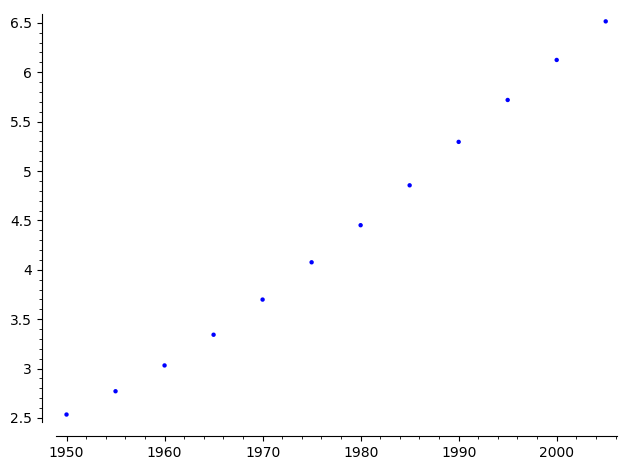

In [16]:
taula=points([[Xt[i],Yt[i]] for i in range(0,len(Xt))]);
show(taula);


In [17]:
len(Xt)

12

In [18]:
len(Yt)

12

In [19]:
taula=list_plot([[Xt[i],Yt[i]] for i in range(0,len(Xt))])


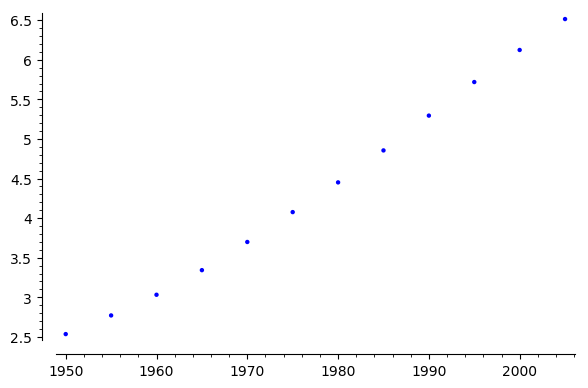

In [20]:
show(taula)

In [21]:
taula.save('taula.pdf');


In [22]:
# 2. Presentació dels models


In [23]:
dY=[(Yt[i+1]-Yt[i])/(Xt[i+1]-Xt[i]) for i in range(0,len(Xt)-1)];
dYY=[dY[i]/Yt[i] for i in range(0,len(dY))];


In [24]:
print("  t","        p(t)","             p'(t)","             p'(t)/p(t)");
for i in range(0,len(Xt)-1):
    print(Xt[i],Yt[i],dY[i],dYY[i])
    

  t         p(t)              p'(t)              p'(t)/p(t)
1950 2.53509300000000 0.0471320000000000 0.0185918228640922
1955 2.77075300000000 0.0522356000000000 0.0188524924451945
1960 3.03193100000000 0.0621680000000000 0.0205044244080752
1965 3.34277100000000 0.0711810000000000 0.0212940102687262
1970 3.69867600000000 0.0754808000000001 0.0204075187986188
1975 4.07608000000000 0.0750779999999999 0.0184191674353791
1980 4.45147000000000 0.0807588000000001 0.0181420519513779
1985 4.85526400000000 0.0879230000000000 0.0181087990272002
1990 5.29487900000000 0.0848332000000001 0.0160217447839696
1995 5.71904500000000 0.0810155999999999 0.0141659315497605
2000 6.12412300000000 0.0781256000000001 0.0127570265979309


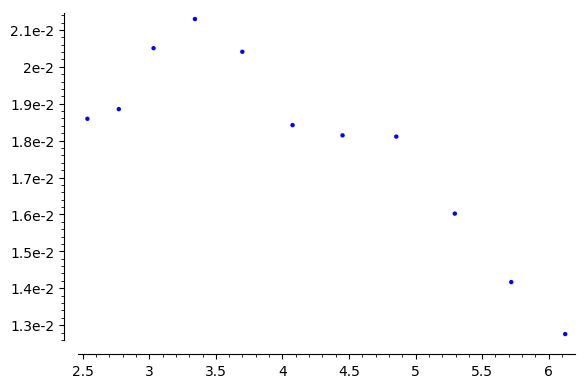

In [25]:
taula0=points([[Yt[i],dYY[i]] for i in range(0,len(dY))]);
show(taula0);


In [26]:
#3. Model de Malthus


In [27]:
a0=mean(dYY);


In [28]:
show(a0)


0.0179331809209386

In [29]:
S=sum(dYY[i] for i in range (0,len(dYY)));
show(S/len(dYY)) #Si no ens enrecordem de la funció per fer la mitja, sempre ho podem fer a ma


0.0179331809209386

In [30]:
var("i p1 t")


(i, p1, t)

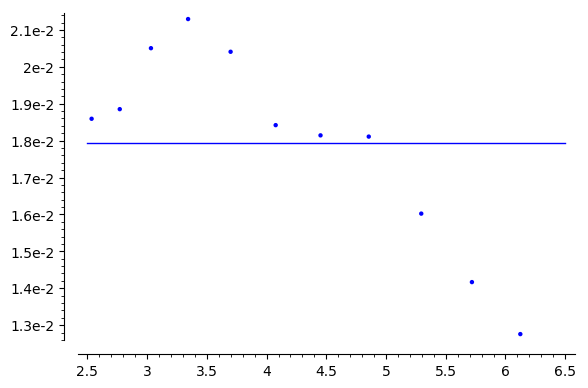

In [31]:
P=points([[Yt[i],dYY[i]] for i in range(0,len(dY))])+plot(a0,(p1,2.5,6.5)); P


In [32]:
p=function("p")(t)

In [33]:
odesol=desolve(diff(p(t),t)-a0*p(t),[p,t],[Xt[0],Yt[0]])


In [34]:
odesol


2535093/1000000*e^(2298657/128178989*t - 4482381150/128178989)

In [35]:
N(2298657/128178989)

0.0179331809209386

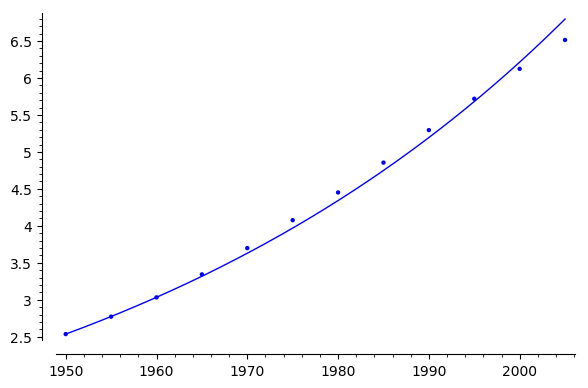

In [36]:
PlotMalthus=plot(odesol(t),(t,1950,2005));PlotMalthus+taula


In [37]:
show(odesol(2050));show(odesol(2050).n());show(n(odesol(2050)));show(odesol(oo))


2535093/1000000*e^(229865700/128178989)

15.2342840086471

15.2342840086471

+Infinity

In [29]:
# 4. Model de Verhulst I
# Conjunt de dades ( p , p'/p ) 


In [32]:
YtdYY=[[Yt[i],dYY[i]] for i in range(0,len(dY))]; YtdYY
#Busquem la recta que s'ajusti més al conjunt de punts (p , p'/p):


[[2.53509300000000, 0.0185918228640922],
 [2.77075300000000, 0.0188524924451945],
 [3.03193100000000, 0.0205044244080752],
 [3.34277100000000, 0.0212940102687262],
 [3.69867600000000, 0.0204075187986188],
 [4.07608000000000, 0.0184191674353791],
 [4.45147000000000, 0.0181420519513779],
 [4.85526400000000, 0.0181087990272002],
 [5.29487900000000, 0.0160217447839696],
 [5.71904500000000, 0.0141659315497605],
 [6.12412300000000, 0.0127570265979309]]

In [33]:
var("a b p1")


(a, b, p1)

In [34]:
model(p1)=a*p1+b


In [35]:
recta0=find_fit(YtdYY,model)


In [36]:
recta0


[a == -0.0018289516293534644, b == 0.025564911399994672]

In [35]:
#Dibuixem junts la recta amb les dades (p,p'/p)


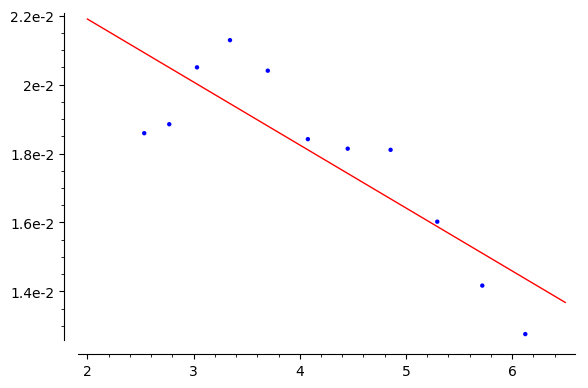

In [36]:
points(YtdYY)+plot(model(a=recta0[0].rhs(),b=recta0[1].rhs()),(p1,2,6.5 ),color="red")


In [37]:
# Calculem el coeficient de correlació per les dades (p,p'/p); per això utilitzem la fòrmula donada i començem 
# calculant la mitjana i la desviació estandard que podem determinar utilitzant la funció corresponent que està 
# programada en Sage (determinarem la desviació estandard de 2 maneres: directament i calculant-la).
# Per la mitjana de p i p'/p respectivament, utilitzarem la funció "mean" de Sage


In [37]:
yt=mean([Yt[i] for i in range(0,len(dY))]); print(yt);
dyy=mean (dYY);dyy


4.17273500000000


0.0179331809209386

In [39]:
# La desviació estandard de p: 1) calculant-la, tenint en compte que len(dY) és el nombre d'elements en 
# la llista creada per "for i in range(0,len(dY))""


In [40]:
sy=sum((Yt[i]-yt)^2 for i in range(0,len(dY)))/(len(dY)-1); print(len(dY));print(sqrt(sy))


11
1.21956996175504


In [41]:
# 2) directament amb Sage


In [42]:
std([Yt[i] for i in range(0,len(dY))])


1.21956996175504

In [43]:
# la desviació estandard de p'/p : 1) calculant-la


In [41]:
sdyy=sum((dYY[i]-dyy)^2 for i in range(0,len(dY)))/(len(dY)-1); print(sqrt(sdyy))


0.00265059878179804


In [45]:
# 2) directe amb Sage


In [43]:
std(dYY)


0.00265059878179804

In [44]:
std([dYY[i] for i in range(0,len(dY))]) # Com veiem, si tenim ja una llista, ens podem estalviar el "for"


0.00265059878179804

In [48]:
# Ara tenim els ingredients per calcular el coeficient de correlació per les dades (p,p'/p)
# El primer factor corresponent a p està determinat per la llista


In [45]:
Zy=[(Yt[i]-yt)/sqrt(sy) for i in range(0,len(dY))];Zy


[-1.34280283325716,
 -1.14957078639626,
 -0.935414970665811,
 -0.680538243829509,
 -0.388709967337828,
 -0.0792533458768582,
 0.228551873808766,
 0.559647270270412,
 0.920114495428502,
 1.26791414063262,
 1.60006236722313]

In [50]:
# El segon factor corresponent a p'/p està determinat per la llista


In [47]:
Zdyy =[(dYY[i]-dyy)/sqrt(sdyy) for i in range(0,len(dY))];Zdyy


[0.248487982291595,
 0.346831640672628,
 0.970061370582987,
 1.26795098936388,
 0.933501476976331,
 0.183349708668758,
 0.0788014511564690,
 0.0662560125913910,
 -0.721133711407055,
 -1.42128238986914,
 -1.95282453102786]

In [52]:
# Aleshores trobem el coefficient de correlació


In [48]:
sum(Zy[i]*Zdyy[i] for i in range(0,len(dY)))/(len(dY)-1)


-0.841520981007737

In [54]:
# Ara volem fer una estimació de l'error basant-se a les dades (p,p'/p); en primer lloc donem el nom Aprox 
# al model lineal trobat


In [49]:
Aprox=model(a=recta0[0].rhs(),b=recta0[1].rhs())


In [50]:
Aprox


-0.0018289516293534644*p1 + 0.025564911399994672

In [51]:
# Aleshores la suma dels quadrats de diferències és: 1) en el cas de la regressió lineal (model de Verhulst I)


In [58]:
sum((Aprox(Yt[i])-dYY[i])^2 for i in range(0,len(dY)))


/opt/sagemath-9.1/local/lib/python3.7/site-packages/sage/misc/functional.py:577: DeprecationWarning: Substitution using function-call syntax and unnamed arguments is deprecated and will be removed from a future release of Sage; you can use named arguments instead, like EXPR(x=..., y=...)
See http://trac.sagemath.org/5930 for details.
  return sum(expression, *args)


0.0000205038980385275

In [59]:
# El SAGE ens informa de que aquesta forma d'entrar les dades quedarà obsoleta en properes versions i ens recomana 
# un altra forma de fer-ho. De totes maneres, l'enllaç ens porta a una pàgina que 11 anys d'antiguitat pel que no
# sembla que el canvi hagi de ser imminent.
#
# en el cas de la mitjana (model de Malthus)


In [52]:
sum((a0-dYY[i])^2 for i in range(0,len(dY))) #Càlcul de diferencies quadrades en el cas de Malthus


0.0000702567390206927

In [61]:
# Com a conclusió podem dir que el model de Verhulst s'ajusta millor a les dades, tot i que la millora no és impressionant.

# 5. Model de Verhulst II

# El model de Verhulst II dóna una millora, tenint en compte que les tres primeres dades de (p,p'/p) no són representatives 
# com que corresponen amb la guerra mundial, i per això no les tindrà en compte a l'hora de fer la regressió lineal.

# Començo doncs en rang a i=3


In [53]:
YtdYY3=[[Yt[i],dYY[i]] for i in range(3,len(dY))];YtdYY3


[[3.34277100000000, 0.0212940102687262],
 [3.69867600000000, 0.0204075187986188],
 [4.07608000000000, 0.0184191674353791],
 [4.45147000000000, 0.0181420519513779],
 [4.85526400000000, 0.0181087990272002],
 [5.29487900000000, 0.0160217447839696],
 [5.71904500000000, 0.0141659315497605],
 [6.12412300000000, 0.0127570265979309]]

In [63]:
# Busquem la recta que s'ajusti més al conjunt de punts (p,p'/p)


In [54]:
var("a b p1");model(p1)=a*p1+b;recta3=find_fit(YtdYY3,model); recta3


[a == -0.0029278249856272845, b == 0.03116151428854692]

In [65]:
#Dibuixem junts la recta amb les dades (p,p'/p)


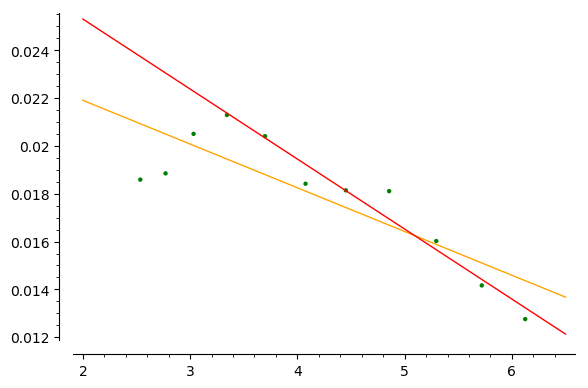

In [55]:
points(YtdYY,color='green')+plot(model(a=recta0[0].rhs(),b=recta0[1].rhs()),(p,2,6.5),color='orange')+\
plot(model(a=recta3[0].rhs(),b=recta3[1].rhs()),(p,2,6.5),color='red')


In [67]:
# Calculem el coeficient de correlació per les dades (p,p'/p); per 
# això emprem la fòrmula donada i començem calculant la mitjana i
# la desviació estandard que poden estar determinat utilitzant la 
# funció corresponent que està programada en Sage (determinarem la
# desviació estandard de 2 maneres: directe i calculant-la).
# Per la mitjana de p i p'/p respectivament, utilitzant la funció "mean" de Sage


In [56]:
yt3=mean([Yt[i] for i in range (3,len(dY))]);yt3


4.17273500000000

In [57]:
dyy3=mean([dYY[i] for i in range(3,len(dY))]);dyy3


0.0174145313016204

In [70]:
# La desviació estandard de p: 1) calculant-la, tenint en compte que
# len(dY) és el nombre d'elements en la llista creada per "for i in range(0,len(dY))"


In [58]:
sy3=sum((Yt[i]-yt3)^2 for i in range(3,len(dY)))/(len(dY)-4);len(dY);sqrt(sy3)


0.981263982127862

In [59]:
std([Yt[i] for i in range(3,len(dY))])  # 2) directe amb Sage


0.981263982127862

In [73]:
# La desviació estandard de p'/p: 1) calculant-la


In [60]:
sdyy3=sum((dYY[i]-dyy3)^2 for i in range(3,len(dY)))/(len(dY)-4);sqrt(sdyy3)


0.00293292938986867

In [61]:
std([dYY[i] for i in range(3,len(dY))]) # 2) directe amb Sage


0.00293292938986867

In [76]:
# Ara tenim els ingredients per calcular el coeficient de correlació per les dades (p,p'/p)
# El primer factor corresponent a p està determinat per la llista


In [62]:
Zy3 =[(Yt[i]-yt3)/sqrt(sy3) for i in range(3,len(dY))]; Zy3


[-1.37834214302565,
 -1.01564157877155,
 -0.631031517795295,
 -0.248473911649424,
 0.163030033623668,
 0.611038936433592,
 1.04330385976258,
 1.45611632142208]

In [78]:
# El segon factor corresponent a p'/p està determinat per la llista:


In [63]:
Zdyy3 =[(dYY[i]-dyy3)/sqrt(sdyy3) for i in range(3,len(dY))];Zdyy3


[1.32273179862659,
 1.02047717457406,
 0.342536761106165,
 0.248052562148484,
 0.236714776693238,
 -0.474878980197048,
 -1.10762971760645,
 -1.58800437534505]

In [80]:
# Aleshores trobem el coefficient de correlació:


In [64]:
var('i');sum(Zy3[i]*Zdyy3[i] for i in range(0,len(Zy3)))/(len(Zy3)-1)


-0.979556213044568

In [82]:
# Ara volem fer una estimació de l'error basant-se a les dades (p, p'/p ):


In [65]:
Aprox3=model(a=recta3[0].rhs(),b=recta3[1].rhs());Aprox3


-0.0029278249856272845*p1 + 0.03116151428854692

In [84]:
# Aleshores la suma dels quadrats de diferències és: en el cas de la regressió lineal (model de Verhulst II),


In [66]:
sum((Aprox3(Yt[i+3])-dYY[i+3])^2 for i in range(0,len(dY)-3))


/opt/sagemath-9.1/local/lib/python3.7/site-packages/sage/misc/functional.py:577: DeprecationWarning: Substitution using function-call syntax and unnamed arguments is deprecated and will be removed from a future release of Sage; you can use named arguments instead, like EXPR(x=..., y=...)
See http://trac.sagemath.org/5930 for details.
  return sum(expression, *args)


2.43685922058400e-6

In [86]:
# en el cas de la regressió lineal (model de Verhulst I),


In [67]:
sum((Aprox(Yt[i])-dYY[i])^2 for i in range (3,len(dY)))


/opt/sagemath-9.1/local/lib/python3.7/site-packages/sage/misc/functional.py:577: DeprecationWarning: Substitution using function-call syntax and unnamed arguments is deprecated and will be removed from a future release of Sage; you can use named arguments instead, like EXPR(x=..., y=...)
See http://trac.sagemath.org/5930 for details.
  return sum(expression, *args)


0.0000121040263242394

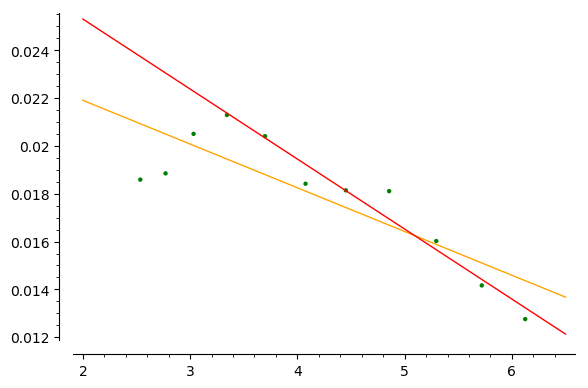

In [88]:
points (YtdYY,color='green')+plot(Aprox,(p,2,6.5),color='orange')+plot(Aprox3,(p,2,6.5),color='red')


In [68]:
t=var('t');p=function('p')(t);eqn=diff(p(t),t)-p(t)*Aprox3(p(t))


In [69]:
print(eqn); Aprox3


-(-0.0029278249856272845*p(t) + 0.03116151428854692)*p(t) + diff(p(t), t)


-0.0029278249856272845*p1 + 0.03116151428854692

In [70]:
sols=desolve(eqn,[p,t],[Xt[3],Yt[3]]);sols


-235288341/7331941*log(326305635814053*p(t) - 3472945883981683) + 235288341/7331941*log(p(t)) == t - 18856915154871237/187042082099662*I - 46686180664198893089/15244430294058110

In [92]:
# Aquí apareix la funció solució p(t) dins un logaritme, la variable t i números complexes. L'hem d'ajudar.

# Veiem que la part esquerra de l'equació es igual a la integral d'una funció del tipus 1/(P(aP+b))

# i que la derivata de la part dreta es 1


In [71]:
var("P");Int=integrate(P^(- 1)*(model(P))^(-1),P); Int


-log(P*a + b)/b + log(P)/b

In [72]:
Int0=Int.subs(a=recta3[0].rhs(),b=recta3[1].rhs()); Int0


32.09086666136566*log(P) - 32.09086666136566*log(-0.0029278249856272845*P + 0.03116151428854692)

In [73]:
Int - Int.subs(P=Yt[3])


-log(P*a + b)/b + log(P)/b + log(3.34277100000000*a + b)/b - 1.20680010374554/b

In [74]:
Xt[3]


1965

In [97]:
# Per tant

# integral entre P[Xt[3]] i P[t] de 1/(P*(aP+b)) =  integral entre Xt[3] i t de la constant 1.

# per tant el terme imaginari no te cap efecte


In [75]:
SolImpl=(Int-Int.subs(P=Yt[3])).subs(a=recta3[0].rhs(),b=recta3[1].rhs())-(t-Xt[3])


In [99]:
SolImpl


-t + 32.09086666136566*log(P) - 32.09086666136566*log(-0.0029278249856272845*P + 0.03116151428854692) + 1802.86544159316

In [77]:
solve(SolImpl,P)


[log(P) == 2024747/64975886*t + log(-1386833/473673463*P + 7331941/235288341) - 2144983695083055/38180545348346]

In [101]:
# Encara no sap resoldre-ho sol doncs pensa que els elements dins els logaritmes poden ser negatius. L'hem d'ajudar 


In [79]:
opl=solve(P/(-1386833/473673463*P + 7331941/235288341)==exp(2024747/64975886*t-2144983695083055/38180545348346),P);
opl;opl0=opl[0].rhs();opl0


3472945883981683/235288341*e^(2024747/64975886*t - 2144983695083055/38180545348346)/(1386833*e^(2024747/64975886*t - 2144983695083055/38180545348346) + 473673463)

In [80]:
var('i');
for i in range(2010,2055,5):
    print(opl0.subs(t=i))
    

3472945883981683/235288341*e^(246441159845115/38180545348346)/(1386833*e^(246441159845115/38180545348346) + 473673463)
3472945883981683/235288341*e^(126194988946100/19090272674173)/(1386833*e^(126194988946100/19090272674173) + 473673463)
3472945883981683/235288341*e^(258338795939285/38180545348346)/(1386833*e^(258338795939285/38180545348346) + 473673463)
3472945883981683/235288341*e^(132143806993185/19090272674173)/(1386833*e^(132143806993185/19090272674173) + 473673463)
3472945883981683/235288341*e^(270236432033455/38180545348346)/(1386833*e^(270236432033455/38180545348346) + 473673463)
3472945883981683/235288341*e^(138092625040270/19090272674173)/(1386833*e^(138092625040270/19090272674173) + 473673463)
3472945883981683/235288341*e^(282134068127625/38180545348346)/(1386833*e^(282134068127625/38180545348346) + 473673463)
3472945883981683/235288341*e^(144041443087355/19090272674173)/(1386833*e^(144041443087355/19090272674173) + 473673463)
3472945883981683/235288341*e^(294031704221795/38

In [81]:
var('i');
for i in range(1965,2005,5):
    print(i,Yt[(i-1965)/5+3],n(opl0.subs(t=i)))
    

1965 3.34277100000000 3.34277099999991
1970 3.69867600000000 3.70991388762916
1975 4.07608000000000 4.09476339729165
1980 4.45147000000000 4.49366061689152
1985 4.85526400000000 4.90232616917611
1990 5.29487900000000 5.31602925018465
1995 5.71904500000000 5.72979985667652
2000 6.12412300000000 6.13866474950730


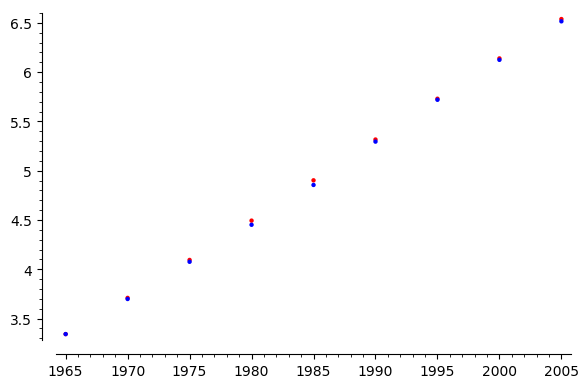

In [82]:
list_plot([[Xt[i],n(opl0.subs(t=5*i+1950))] for i in range(3,len(Xt))],color='red')+\
list_plot([[Xt[i],Yt[i]] for i in range(3,len(Xt))])


In [83]:
for i in range(2005,2050,5):
    print(i,n(opl0.subs(t=i)))
    

2005 6.53788374205261
2010 6.92316284775327
2015 7.29082468258608
2020 7.63792333646508
2025 7.96229909676954
2030 8.26257619268085
2035 8.53811275575866
2040 8.78891573535975
2045 9.01553452634071


In [107]:
t7=solve(opl0==7,t);t7;t7[0].rhs().n() # En quin any arribarem als 7 mil millions?


2011.02397125036

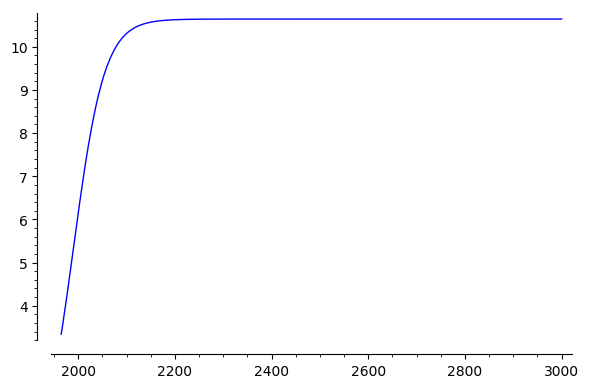

In [108]:
plot(opl0,1965,3000)


In [109]:
# Quan comença a estabilitzar-se?

# Que vol dir "estabilitzar-se"? Criteri quantitatiu? Criteri qualitatiu?


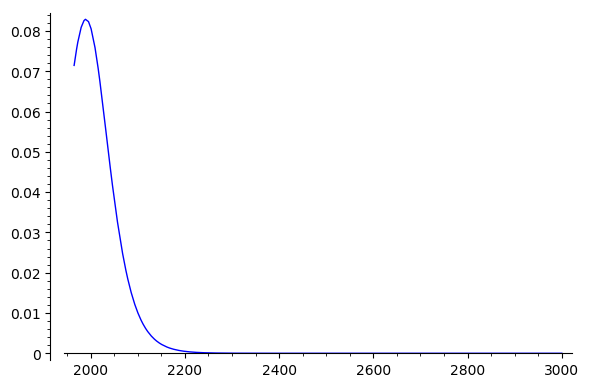

In [110]:
plot(diff(opl0,t,1),1965,3000)


In [111]:
find_root(diff(opl0,t,2)==0,1965,2100)


1990.06736648427

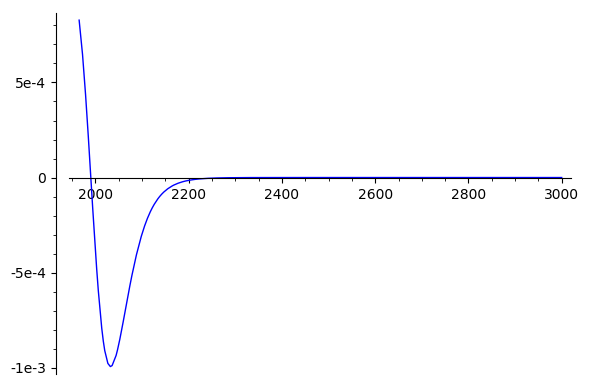

In [112]:
plot(diff(opl0,t,2),1965,3000)


In [113]:
find_root(diff(opl0,t,3)==0,2000,2100)


2032.3296867531913

In [114]:
show(opl0)


3472945883981683/235288341*e^(2024747/64975886*t - 2144983695083055/38180545348346)/(1386833*e^(2024747/64975886*t - 2144983695083055/38180545348346) + 473673463)

In [115]:
limiet=3472945883981683/(235288341*1386833);show(limiet);n(limiet) # quin és el suprem?


3472945883981683/326305635814053

10.6432298520298